In [1]:
# IMPORTING PACKAGES

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# Import Bike Data for each year, and format the dataframes.
# From: https://donnees.montreal.ca/dataset/velos-comptage

full_data_2022 = pd.read_csv('comptage_velo_2022.csv')
data_2022 = full_data_2022[["date", "heure", "nb_passages"]].copy()
data_2022['datetime'] = pd.to_datetime(data_2022['date'] + data_2022['heure'], format='%Y-%m-%d%H:%M:%S')
daily_sum_2022 = data_2022.groupby(data_2022.datetime.dt.date)['nb_passages'].sum()

full_data_2021 = pd.read_csv('comptage_velo_2021.csv')
data_2021 = full_data_2021[["date", "heure", "nb_passages"]].copy()
data_2021['datetime'] = pd.to_datetime(data_2021['date'] + data_2021['heure'], format='%Y-%m-%d%H:%M:%S')
daily_sum_2021 = data_2021.groupby(data_2021.datetime.dt.date)['nb_passages'].sum()

full_data_2020 = pd.read_csv('comptage_velo_2020.csv')
data_2020 = full_data_2020[["date", "heure", "nb_passages"]].copy()
data_2020['datetime'] = pd.to_datetime(data_2020['date'] + data_2020['heure'], format='%Y-%m-%d%H:%M:%S')
daily_sum_2020 = data_2020.groupby(data_2020.datetime.dt.date)['nb_passages'].sum()

full_data_2019 = pd.read_csv('comptage_velo_2019.csv')
data_2019 = full_data_2019[["date", "heure", "nb_passages"]].copy()
data_2019['datetime'] = pd.to_datetime(data_2019['date'] + data_2019['heure'], format='%Y-%m-%d%H:%M:%S')
daily_sum_2019 = data_2019.groupby(data_2019.datetime.dt.date)['nb_passages'].sum()

# Make one large dataset for all years
df_bikes = pd.concat([daily_sum_2019,daily_sum_2020,daily_sum_2021,daily_sum_2022])

In [3]:
# Import Climate Data for each year, and format the dataframes.
# These max and min temperature values are taken from YUL airport.
# From: https://climate.weather.gc.ca/climate_data/daily_data_e.html?hlyRange=2008-01-08%7C2023-12-07&dlyRange=2002-12-23%7C2023-12-07&mlyRange=%7C&StationID=30165&Prov=QC&urlExtension=_e.html&searchType=stnName&optLimit=specDate&StartYear=1840&EndYear=2023&selRowPerPage=25&Line=2&searchMethod=contains&txtStationName=montreal&timeframe=2&time=LST&Day=7&Year=2022&Month=7#

full_clim_data_2022 = pd.read_csv('en_climate_daily_QC_702S006_2022_P1D.csv')
clim_data_2022 = full_clim_data_2022[["Date/Time", "Max Temp (°C)", "Min Temp (°C)", "Total Precip (mm)"]].copy()
clim_data_2022 = clim_data_2022.rename(columns={'Date/Time': 'datetime'})
clim_data_2022 = clim_data_2022.set_index('datetime')

full_clim_data_2021 = pd.read_csv('en_climate_daily_QC_702S006_2021_P1D.csv')
clim_data_2021 = full_clim_data_2021[["Date/Time", "Max Temp (°C)", "Min Temp (°C)", "Total Precip (mm)"]].copy()
clim_data_2021 = clim_data_2021.rename(columns={'Date/Time': 'datetime'})
clim_data_2021 = clim_data_2021.set_index('datetime')

full_clim_data_2020 = pd.read_csv('en_climate_daily_QC_702S006_2020_P1D.csv')
clim_data_2020 = full_clim_data_2020[["Date/Time", "Max Temp (°C)", "Min Temp (°C)", "Total Precip (mm)"]].copy()
clim_data_2020 = clim_data_2020.rename(columns={'Date/Time': 'datetime'})
clim_data_2020 = clim_data_2020.set_index('datetime')

full_clim_data_2019 = pd.read_csv('en_climate_daily_QC_702S006_2019_P1D.csv')
clim_data_2019 = full_clim_data_2019[["Date/Time", "Max Temp (°C)", "Min Temp (°C)", "Total Precip (mm)"]].copy()
clim_data_2019 = clim_data_2019.rename(columns={'Date/Time': 'datetime'})
clim_data_2019 = clim_data_2019.set_index('datetime')

# Make one large dataset for all years
df_temp = pd.concat([clim_data_2019,clim_data_2020,clim_data_2021,clim_data_2022])

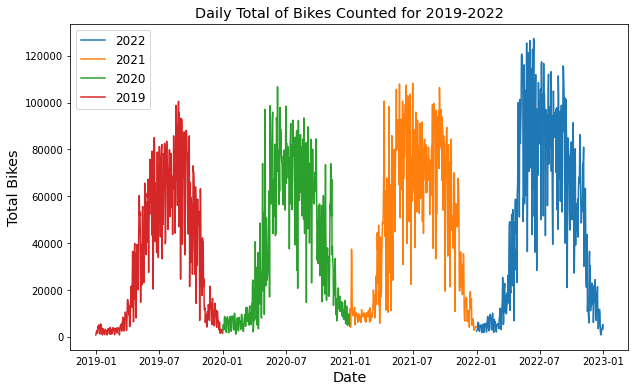

In [4]:
plt.figure(figsize=(10,6))

plt.plot(daily_sum_2022.index, daily_sum_2022.values, label='2022')
plt.plot(daily_sum_2021.index, daily_sum_2021.values, label='2021')
plt.plot(daily_sum_2020.index, daily_sum_2020.values, label='2020')
plt.plot(daily_sum_2019.index, daily_sum_2019.values, label='2019')

plt.legend(loc=0,fontsize='large')
plt.title("Daily Total of Bikes Counted for 2019-2022", fontsize='x-large')
plt.ylabel("Total Bikes", fontsize='x-large')
plt.xlabel("Date", fontsize='x-large')

plt.show()

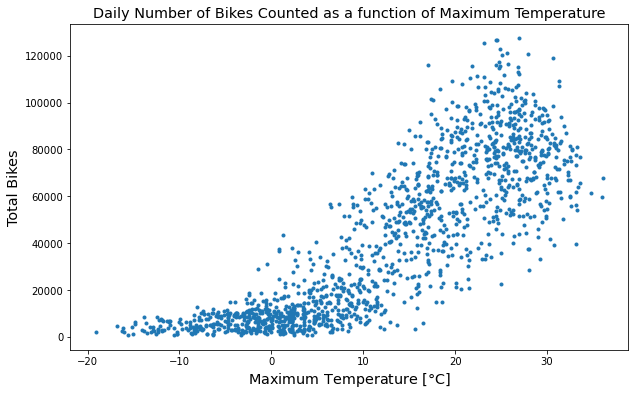

In [5]:
plt.figure(figsize=(10,6))

plt.plot(df_temp['Max Temp (°C)'].values, df_bikes.values, '.')

plt.title("Daily Number of Bikes Counted as a function of Maximum Temperature", fontsize='x-large')
plt.xlabel("Maximum Temperature [$\degree$C]", fontsize='x-large')
plt.ylabel("Total Bikes", fontsize='x-large')

plt.show()

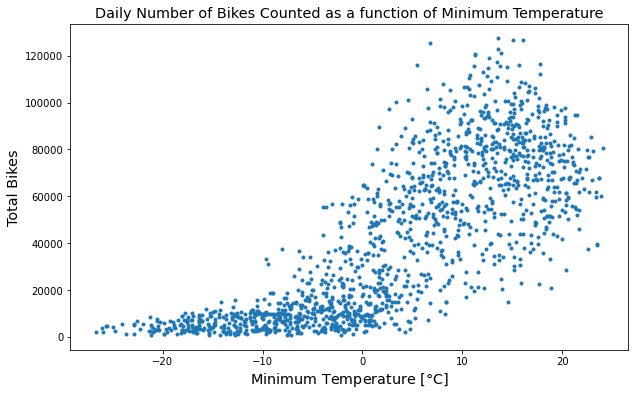

In [6]:
plt.figure(figsize=(10,6))

plt.plot(df_temp['Min Temp (°C)'].values, df_bikes.values, '.')

plt.title("Daily Number of Bikes Counted as a function of Minimum Temperature", fontsize='x-large')
plt.xlabel("Minimum Temperature [$\degree$C]", fontsize='x-large')
plt.ylabel("Total Bikes", fontsize='x-large')

plt.show()

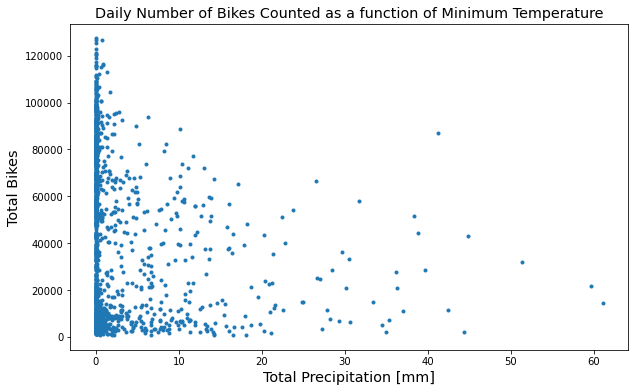

In [7]:
plt.figure(figsize=(10,6))

plt.plot(df_temp['Total Precip (mm)'].values, df_bikes.values, '.')

plt.title("Daily Number of Bikes Counted as a function of Minimum Temperature", fontsize='x-large')
plt.xlabel("Total Precipitation [mm]", fontsize='x-large')
plt.ylabel("Total Bikes", fontsize='x-large')

plt.show()

We can see that the daily amount of precipitation does not have even close to the same correlation as the maximum or minimum temperatures do.  

Since the temperature graphs look roughly exponential, we will transform the data to a log scale to fit a linear regression.

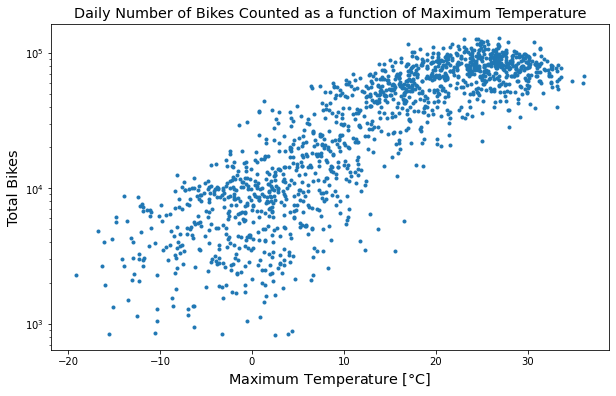

In [8]:
# Example to test out the potential of our linear regression
plt.figure(figsize=(10,6))

plt.plot(df_temp['Max Temp (°C)'].values, df_bikes.values, '.')
plt.yscale("log")

plt.title("Daily Number of Bikes Counted as a function of Maximum Temperature", fontsize='x-large')
plt.xlabel("Maximum Temperature [$\degree$C]", fontsize='x-large')
plt.ylabel("Total Bikes", fontsize='x-large')

plt.show()

In [9]:
# Removing any NaN values to allow for statistical analysis and transforming data to logarithmic scale
df_log_max = df_temp[['Max Temp (°C)']].copy()
df_log_max['nb_passages'] = np.log(df_bikes.values)
df_log_max = df_log_max.dropna(axis=0)

df_log_min = df_temp[['Min Temp (°C)']].copy()
df_log_min['nb_passages'] = np.log(df_bikes.values)
df_log_min = df_log_min.dropna(axis=0)

In [10]:
# Sanity check to make sure our NaNs are gone
print(df_log_max['Max Temp (°C)'].isnull().values.any())
print(df_log_min['Min Temp (°C)'].isnull().values.any())

False
False


In [11]:
max_r,max_p=stats.pearsonr(df_log_max['Max Temp (°C)'].values, df_log_max['nb_passages'].values)
min_r,min_p=stats.pearsonr(df_log_min['Min Temp (°C)'].values, df_log_min['nb_passages'].values)
print("For maximum temperature, the Pearson correlation coefficient is:", max_r, "and the p-value is:", max_p)
print("For minimum temperature, the Pearson correlation coefficient is:", min_r, "and the p-value is:", min_p)

For maximum temperature, the Pearson correlation coefficient is: 0.8577505169897611 and the p-value is: 0.0
For minimum temperature, the Pearson correlation coefficient is: 0.8218600065993895 and the p-value is: 0.0


In [12]:
max_m,max_b,max_linr,max_linp,max_stderr=stats.linregress(df_log_max['Max Temp (°C)'].values, df_log_max['nb_passages'].values)
min_m,min_b,min_linr,min_linp,min_stderr=stats.linregress(df_log_min['Min Temp (°C)'].values, df_log_min['nb_passages'].values)
print("For maximum temperature, the line of best fit slope is:", max_m, ", the intercept is:", max_b, 
      ", and the standard error is:", max_stderr, ". The r-value is:", max_linr, ", and the p-value is:",
      max_linp)
print("For minimum temperature, the line of best fit slope is:", min_m, ", the intercept is:", min_b, 
      ", and the standard error is:", min_stderr, ". The r-value is:", min_linr, ", and the p-value is:",
      min_linp)

For maximum temperature, the line of best fit slope is: 0.08476516900609489 , the intercept is: 9.063182624483021 , and the standard error is: 0.0013341095297327177 . The r-value is: 0.8577505169897613 , and the p-value is: 0.0
For minimum temperature, the line of best fit slope is: 0.08674063470658284 , the intercept is: 9.837337691294191 , and the standard error is: 0.0015789884905073937 . The r-value is: 0.8218600065993895 , and the p-value is: 0.0


Cool! So the p-values both being zero mean that we can reject the null hypothesis and thus we have some statistically significant data. The correlation coefficients are positive showing a positive relationship. The r-values of 0.858 and 0.821 show a strong correlation of the data, with the maximum daily temperature being a slightly better indicator of the total number of bikes counted.

Now let's see what the line of best fit looks like when graphed!

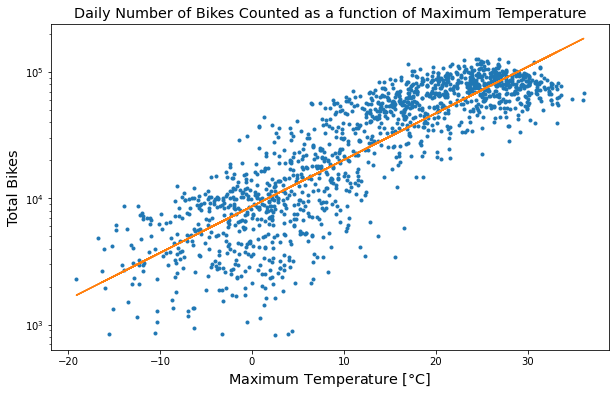

In [13]:
plt.figure(figsize=(10,6))

plt.plot(df_temp['Max Temp (°C)'].values, df_bikes.values, '.')
plt.plot(df_temp['Max Temp (°C)'].values, np.exp(max_m*df_temp['Max Temp (°C)'].values + max_b))
plt.yscale("log")

plt.title("Daily Number of Bikes Counted as a function of Maximum Temperature", fontsize='x-large')
plt.xlabel("Maximum Temperature [$\degree$C]", fontsize='x-large')
plt.ylabel("Total Bikes", fontsize='x-large')

plt.show()

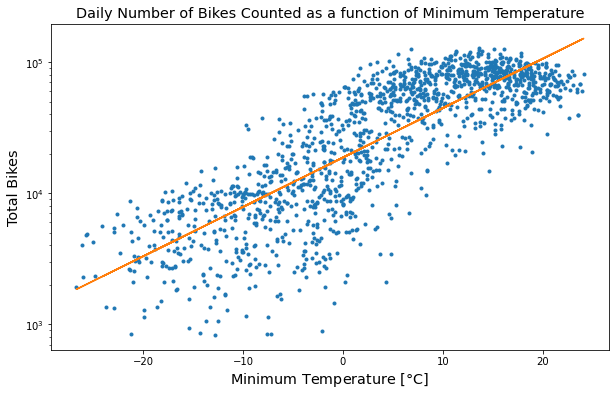

In [14]:
plt.figure(figsize=(10,6))

plt.plot(df_temp['Min Temp (°C)'].values, df_bikes.values, '.')
plt.plot(df_temp['Min Temp (°C)'].values, np.exp(min_m*df_temp['Min Temp (°C)'].values + min_b))
plt.yscale("log")

plt.title("Daily Number of Bikes Counted as a function of Minimum Temperature", fontsize='x-large')
plt.xlabel("Minimum Temperature [$\degree$C]", fontsize='x-large')
plt.ylabel("Total Bikes", fontsize='x-large')

plt.show()

In [15]:
monthly_sum_2022 = data_2022.groupby(data_2022.datetime.dt.month)['nb_passages'].sum()
monthly_sum_2021 = data_2021.groupby(data_2021.datetime.dt.month)['nb_passages'].sum()
monthly_sum_2020 = data_2020.groupby(data_2020.datetime.dt.month)['nb_passages'].sum()
monthly_sum_2019 = data_2019.groupby(data_2019.datetime.dt.month)['nb_passages'].sum()

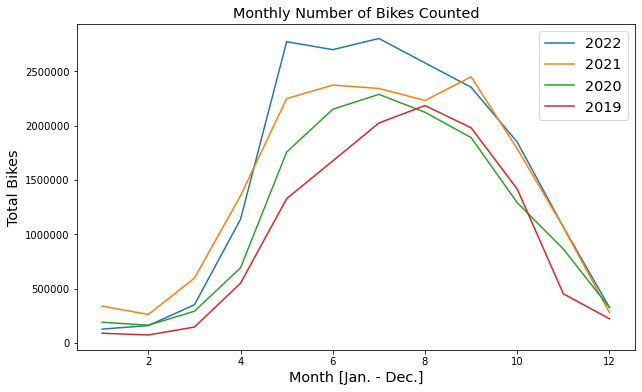

In [16]:
plt.figure(figsize=(10,6))

plt.plot(monthly_sum_2022.index, monthly_sum_2022.values, label='2022')
plt.plot(monthly_sum_2021.index, monthly_sum_2021.values, label='2021')
plt.plot(monthly_sum_2020.index, monthly_sum_2020.values, label='2020')
plt.plot(monthly_sum_2019.index, monthly_sum_2019.values, label='2019')

plt.ticklabel_format(scilimits=(-5, 8))
plt.title("Monthly Number of Bikes Counted", fontsize='x-large')
plt.xlabel("Month [Jan. - Dec.]", fontsize='x-large')
plt.ylabel("Total Bikes", fontsize='x-large')
plt.legend(fontsize='x-large')

plt.show()